### PHASE 2:-

# Email Spam Detection 

A Email Spam also referred to as junk email, spam email, or simply spam, is unsolicited messages sent in bulk by email. The name comes from a Monty Python sketch in which the name of the canned pork product spam is ubiquitous,unavoidable and repetitive.

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('C:\\Users\\HP\\Downloads\\spam.csv')

In [3]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Cleaning Data

In [4]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [5]:
df['spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)

In [6]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### Exploratory Data Analysis (EDA)

In [7]:
# finding the number of category
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

### Data Visulaization

In [8]:
import seaborn as sns

In [9]:
sns.set()

<AxesSubplot:xlabel='Category', ylabel='count'>

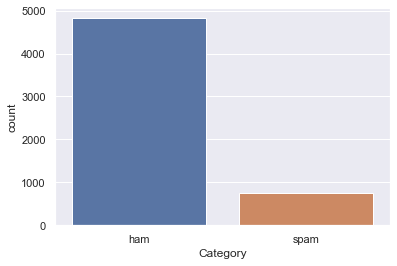

In [10]:
# making a count plot for "Category" column
sns.countplot(x='Category', data=df)

### Spliting the data into Training data and Testing data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(df.Message,df.spam,test_size=0.25)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
v=CountVectorizer()
x_train_count=v.fit_transform(x_train.values)
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
model=MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [17]:
emails=[
       'Hey Mohan, can we get together to watch football gamr tomorrow?',
       'Upto 20% discount on parking, exclusive offer just for you, dont miss this reward!'
]
emails_count=v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [19]:
x_test_count=v.transform(x_test)
model.score(x_test_count,y_test)

0.9856424982053122

In [22]:
from sklearn.pipeline import Pipeline
cif=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [23]:
cif.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [24]:
cif.score(x_test,y_test)

0.9856424982053122

In [25]:
cif.predict(emails)

array([0, 1], dtype=int64)